In [155]:
import yfinance as yf 
import pandas as pd
import numpy as np

In [156]:
data = pd.read_excel("dok.xlsx")
data.columns = ["Timestamp", *[f"Q_{i}" for i in range(1, 31)]]

In [157]:
data = data[1:]
x = []
for col in data.columns[1:]:
  vals = data[col].dropna().unique()
  x += vals.tolist()
x

['Neutral',
 'Effective',
 'Very Effective',
 'Ineffective',
 'Well',
 'Neutral',
 'Very Well',
 'Satisfied',
 'Very Dissatisfied',
 'Very satisfied',
 'Neutral',
 'Neutral',
 'Effective',
 'Ineffective',
 'Very Effective',
 'Neutral',
 'Well',
 'Very Well',
 'Ineffective',
 'Very Effective',
 'Effective',
 'Neutral',
 'Satisfied',
 'Very Satisfied',
 'Very Dissatisfied',
 'Neutral',
 'Good',
 'Very Good',
 'Neutral',
 'Neutral',
 'Very Effective',
 'Ineffective',
 'Effective',
 'Satisfied',
 'Dissatisfied',
 'Very satisfied',
 'Neutral',
 'Very Dissatisfied',
 'Very well',
 'Well',
 'Neutral',
 'Effective',
 'Very Ineffective',
 'Very Effective',
 'Neutral',
 'Satisfied',
 'Very satisfied',
 'Well',
 'Very well',
 'Neutral',
 'Effective',
 'Very Effective',
 'Ineffective',
 'Neutral',
 'Neutral',
 'Dissatisfied',
 'Satisfied',
 'Very Satisfied',
 'Good',
 'Neutral',
 'Excellent',
 'Poor',
 'Satisfied',
 'Dissatisfied',
 'Very Satisfied',
 'Neutral',
 'Excellent',
 'Poor',
 'Good',
 'N

In [158]:
cats = set(x)

In [159]:
cat_map = {
  'Very Dissatisfied': 1,
  'Very Unlikely': 1,
  'Very Poor': 1,
  'Very Ineffective': 1,
  'Dissatisfied': 2,
  'Unlikely': 2,
  'Poor': 2,
  'Ineffective': 2,
  'Neutral': 3,
  'Satisfied': 4,
  'Likely': 4,
  'Effective': 4,
  'Good': 4,
  'Well': 4,
  'Very Good': 5,
  'Very Well': 5,
  'Very well': 5,
  'Very Satisfied': 5,
  'Very satisfied': 5,
  'Very Likely': 5,
  'Excellent': 5,
  'Very Effective': 5,
}

In [160]:

y = [cat_map[cat] for cat in cats]

In [161]:
for col in data.columns[1:]:

  data[col] = data[col].map(cat_map)
  data[col] = data[col].fillna(3)

data.head()

,Timestamp,Q_1,Q_2,Q_3,Q_4,Q_5,Q_6,Q_7,Q_8,Q_9,...,Q_21,Q_22,Q_23,Q_24,Q_25,Q_26,Q_27,Q_28,Q_29,Q_30
1,2024-07-16 16:00:10.491,3,4,4,3,3,2,4,4,3,...,4,4,4,4,4.0,3,3,4,4,5
2,2024-07-16 16:04:02.222,4,4,4,4,4,5,5,5,3,...,4,5,3,4,5.0,4,5,5,4,3
3,2024-07-16 16:04:04.938,4,4,4,4,4,5,5,5,3,...,4,5,3,4,5.0,4,5,5,4,3
4,2024-07-16 16:04:06.916,4,4,4,4,4,5,5,5,3,...,4,5,3,4,5.0,4,5,5,4,3
5,2024-07-16 16:04:08.150,4,4,4,4,4,5,5,5,3,...,4,5,3,4,5.0,4,5,5,4,3


In [168]:
x

['Q_1',
 'Q_2',
 'Q_3',
 'Q_4',
 'Q_5',
 'Q_6',
 'Q_7',
 'Q_8',
 'Q_9',
 'Q_10',
 'Q_11',
 'Q_12',
 'Q_13',
 'Q_14',
 'Q_15',
 'Q_16',
 'Q_17',
 'Q_18',
 'Q_19',
 'Q_20',
 'Q_21',
 'Q_22',
 'Q_23',
 'Q_24',
 'Q_25',
 'Q_26',
 'Q_27',
 'Q_28',
 'Q_29',
 'Q_30']

In [170]:
data[x].to_excel("dok_clean.xlsx", index=False)

In [171]:
data = pd.read_excel("doki.xlsx", sheet_name="Sheet2")
data = data[data.columns[:2]]

In [172]:
data.head()

,X,Y
0,3.6,3.8
1,4.0,4.0
2,4.0,4.0
3,4.0,4.0
4,4.0,4.0


In [177]:
corr = data.corr().iloc[1, 0]
corr
cov = data.cov().iloc[1, 0]
cov

0.24331034486467437

In [179]:
b1 = cov/data["X"].var()
b0 = data["Y"].mean() - b1 * data["X"].mean()

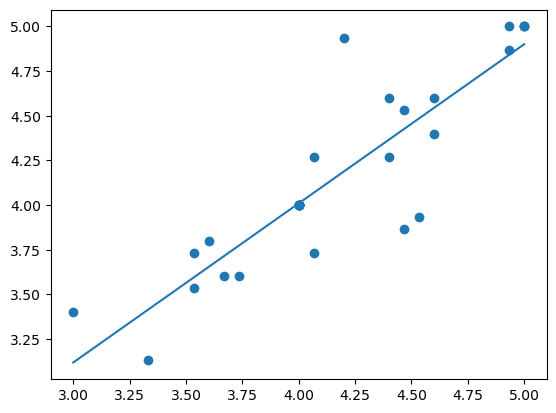

In [186]:
import matplotlib.pyplot as plt

plt.scatter(data["X"], data["Y"], )
x = np.linspace(3, 5, 50)
plt.xlabel("Market Strategies")
plt.ylabel("Customer Satisfaction")

plt.plot(x, b0 + b1 * x)
